Dataset for this notebook you can find on the link: https://archive.ics.uci.edu/ml/datasets/Energy+efficiency

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading dataset
energy_dataset = pd.read_excel('energy_dataset.xlsx')

In [3]:
energy_dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses. 

Specifically: 

X1	Relative Compactness 

X2	Surface Area 

X3	Wall Area 

X4	Roof Area 

X5	Overall Height 

X6	Orientation 

X7	Glazing Area 

X8	Glazing Area Distribution 

y1	Heating Load 

y2	Cooling Load


Since Y1 and Y2 are not class labels we will need to analyse those colums and transform those into labels (0 and 1). And at the end we will have binary classification problem.

## Step 1. Analyse class colums

In [4]:
print("The highes Heating load is: {}".format(np.max(energy_dataset['Y1'])))
print("The highes Cooling load is: {}".format(np.max(energy_dataset['Y2'])))

The highes Heating load is: 43.1
The highes Cooling load is: 48.03


In [5]:
print("The lowest Heating load is: {}".format(np.min(energy_dataset['Y1'])))
print("The lowest Cooling load is: {}".format(np.min(energy_dataset['Y2'])))

The lowest Heating load is: 6.01
The lowest Cooling load is: 10.9


Let's  get additional information about mean and variance of both colums.

In [6]:
print("The mean of Heating load is: {}".format(np.mean(energy_dataset['Y1'])))
print("The mean of Cooling load is: {}".format(np.mean(energy_dataset['Y2'])))

The mean of Heating load is: 22.30719531249997
The mean of Cooling load is: 24.58776041666671


In [7]:
print("The standard deviation of Heating load is: {}".format(np.std(energy_dataset['Y1'])))
print("The standard deviation of Cooling load is: {}".format(np.std(energy_dataset['Y2'])))

The standard deviation of Heating load is: 10.08363268719098
The standard deviation of Cooling load is: 9.50710998657144


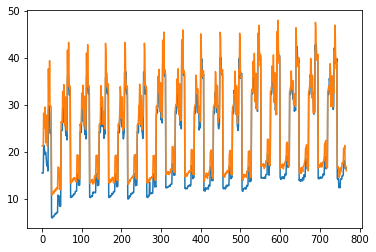

In [8]:
plt.plot(energy_dataset['Y1'])
plt.plot(energy_dataset['Y2'])
plt.show()

In [9]:
import scipy.stats as stats

In [10]:
fit = stats.norm.pdf(energy_dataset['Y2'], np.mean(energy_dataset['Y2']), np.std(energy_dataset['Y2']))

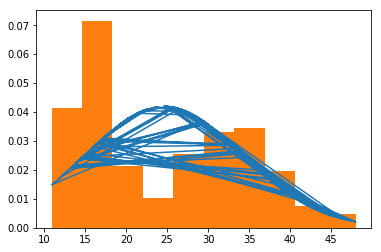

In [11]:
plt.plot(energy_dataset['Y2'],fit,)
plt.hist(energy_dataset['Y2'], normed=True)
plt.show()

As we can see, mean of Heating load is 22 and for Cooling load is 24. We are going to set those values as the threshold. So for example, values from Heating load below 22 will be 0 (or low) and 
above that value will be classified as 1.

## Step 2. Data preprocessing

In [12]:
high_heat = energy_dataset.Y1 >= 22
low_heat = energy_dataset.Y1 < 22
energy_dataset.loc[high_heat,'Y1'] = 1
energy_dataset.loc[low_heat,'Y1'] = 0

high_cool = energy_dataset.Y2 >= 24
low_cool = energy_dataset.Y2 < 24
energy_dataset.loc[high_cool,'Y2'] = 1
energy_dataset.loc[low_cool,'Y2'] = 0

In [13]:
energy_dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,0.0,0.0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,0.0,0.0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,0.0,0.0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,0.0,0.0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,0.0,1.0


In [14]:
features = energy_dataset.iloc[:, :-2].values
labels_heat = energy_dataset.iloc[:, -2].values
labels_cool = energy_dataset.iloc[:, -1].values

In [15]:
print(features[:10])
print(labels_heat[:10])
print(labels_cool[:10])

[[   0.98  514.5   294.    110.25    7.      2.      0.      0.  ]
 [   0.98  514.5   294.    110.25    7.      3.      0.      0.  ]
 [   0.98  514.5   294.    110.25    7.      4.      0.      0.  ]
 [   0.98  514.5   294.    110.25    7.      5.      0.      0.  ]
 [   0.9   563.5   318.5   122.5     7.      2.      0.      0.  ]
 [   0.9   563.5   318.5   122.5     7.      3.      0.      0.  ]
 [   0.9   563.5   318.5   122.5     7.      4.      0.      0.  ]
 [   0.9   563.5   318.5   122.5     7.      5.      0.      0.  ]
 [   0.86  588.    294.    147.      7.      2.      0.      0.  ]
 [   0.86  588.    294.    147.      7.      3.      0.      0.  ]]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  1.  1.  1.  1.  1.  0.]


### Step 2.1 Scaling data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaller = StandardScaler()
features = scaller.fit_transform(features)

In [18]:
print(features[0])

[ 2.04177671 -1.78587489 -0.56195149 -1.47007664  1.         -1.34164079
 -1.76044698 -1.81457514]


### Step 2.2 Spliting to training and testing parts

In [19]:
from sklearn.cross_validation import train_test_split

In [20]:
X_train_cool, X_test_cool, y_train_cool, y_test_cool = train_test_split(features, labels_cool, test_size=0.3)
X_train_heat, X_test_heat, y_train_heat, y_test_heat = train_test_split(features, labels_heat, test_size=0.3)

## Step 3. Predicting time

### Step 3.1 (Optional) Predicting using custom algorithm

In [21]:
from naive_b_custom import *

In [44]:
custom_nb_cold = NaiveBayesClassifier()
custom_nb_heat = NaiveBayesClassifier()

In [45]:
custom_nb_cold.fit(X_train_cool, y_train_cool)
custom_nb_heat.fit(X_train_heat, y_train_heat)

In [74]:
predicted_custom_cool = custom_nb_cold.predict(X_test_cool, radius=1.3)
print("Custom naive_cool accuracy: ", accuracy(predicted_custom_cool, y_test_cool))
predicted_custom_heat = custom_nb_heat.predict(X_test_heat, radius=1)
print("Custom naive_heat accuracy: ", accuracy(predicted_custom_heat, y_test_heat))

Custom naive_cool accuracy:  98.7012987012987
Custom naive_heat accuracy:  99.56709956709958


Custom algortihm is working pretty fast and accuracy is stunning. Negative side of my implementation is that you have try and check the best radius, in that means this algorithm
can be better.

### Step 3.2 Predicting using Sklearn

In [61]:
from sklearn.naive_bayes import GaussianNB

In [68]:
cold_bayes = GaussianNB()
cold_bayes.fit(X_train_cool, y_train_cool)

GaussianNB()

In [69]:
pred_cold = cold_bayes.predict(X_test_cool)
print("Cold sklearn accuray: {}".format(accuracy(pred_cold, y_test_cool)))

Cold sklearn accuray: 98.7012987012987


In [70]:
heat_bayes = GaussianNB()
heat_bayes.fit(X_train_heat, y_train_heat)

GaussianNB()

In [78]:
pred_hot = heat_bayes.predict(X_test_heat)
print("Cold sklearn accuray: {}".format(accuracy(pred_hot, y_test_heat)))

Cold sklearn accuray: 98.7012987012987


In [79]:
from sklearn.cross_validation import cross_val_score

In [81]:
precisions = cross_val_score(cold_bayes, X_train_heat, y_train_heat, cv=10, scoring='precision')
print('Precision(Heat) =>> P = True_positive / (True_positive + False_positive): ', np.mean(precisions))

recalls = cross_val_score(cold_bayes, X_train_heat, y_train_heat, cv=5, scoring='recall')
print('Recalls(Heat) =>> True_positive / (True_positive + False_negative): ', np.mean(recalls))

Precision(Heat) =>> P = True_positive / (True_positive + False_positive):  0.95489235541
Recalls(Heat) =>> True_positive / (True_positive + False_negative):  1.0


In [82]:
precisions = cross_val_score(heat_bayes, X_train_cool, y_train_cool, cv=10, scoring='precision')
print('Precision(Heat) =>> P = True_positive / (True_positive + False_positive): ', np.mean(precisions))

recalls = cross_val_score(heat_bayes, X_train_cool, y_train_cool, cv=5, scoring='recall')
print('Recalls(Heat) =>> True_positive / (True_positive + False_negative): ', np.mean(recalls))

Precision(Heat) =>> P = True_positive / (True_positive + False_positive):  0.978174603175
Recalls(Heat) =>> True_positive / (True_positive + False_negative):  1.0


As you can see, in this example, custom algorithm is giving better accuracy than one from sklearn library.
Overall we got pretty nice accury (all over 95%).